# Carregando Dados

In [1]:
import numpy as np
from scipy.stats import shapiro
import scipy.stats as stats
import seaborn as sns
import os
import pandas as pd
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP,ZeroInflatedPoisson
from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson
import matplotlib.pyplot as plt

In [2]:
path_data = os.path.join(os.getcwd(),r"experiments_data\05_analyses\01_data\dataset_valid_window.csv")
df_window = pd.read_csv(path_data, delimiter=';')
exp_1 = df_window.query("Experimento == 2")["Méd. F1-Score"]
exp_2 = df_window.query("Experimento == 3")["Méd. F1-Score"]
exp_3 = df_window.query("Experimento == 4")["Méd. F1-Score"]

df_window.info()
df_window.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Experimento           19 non-null     int64  
 1   Janela                19 non-null     object 
 2   Méd. F1-Score         19 non-null     float64
 3   Méd Precision         19 non-null     float64
 4   Méd Recall            19 non-null     float64
 5   Méd. Acc Treino       19 non-null     float64
 6   Méd. Acc Test         19 non-null     float64
 7   Total Observações     19 non-null     int64  
 8   Proporção Janela      19 non-null     float64
 9   Proporção Observação  19 non-null     float64
 10  Ordem                 19 non-null     int64  
 11  MaxMed                19 non-null     int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 1.9+ KB


,Experimento,Janela,Méd. F1-Score,Méd Precision,Méd Recall,Méd. Acc Treino,Méd. Acc Test,Total Observações,Proporção Janela,Proporção Observação,Ordem,MaxMed
0,2,3025x32,99.211811,98.997706,99.433636,99.285951,99.206908,96800,0.031250,0.000331,1,1
1,2,3872x25,98.760495,98.604670,98.922340,98.823055,98.756670,96800,0.040000,0.000258,2,0
2,2,4400x22,98.336007,98.335451,98.344156,98.443182,98.334416,96800,0.045455,0.000227,3,0
3,2,4840x20,97.792988,97.946289,97.650531,97.948642,97.795159,96800,0.050000,0.000207,4,0
4,2,9680x10,93.766854,94.768948,92.824675,94.114522,93.831169,96800,0.100000,0.000103,5,0


In [4]:
np_array = df_window["Méd. F1-Score"]
np_array = np.array(np_array, dtype=float)
print(np_array)

[99.21181094 98.76049489 98.33600697 97.79298769 93.76685438 74.31344288
 73.01536573 99.83775864 99.82874511 99.75430975 99.66212143 99.4823438
 99.0819103  98.43003457 97.36878244 95.71463001 93.68927282 91.23677584
 84.45082828]


# Identificando a Distribuição

In [5]:
alpha = 0.5
statistic, p_value = shapiro(np_array)
if p_value < alpha: msg = "isn't normally distributed"
else: msg = "is normally distributed"
print(f"Shapiro-Wil statistc {statistic}, p-value {p_value}. Distribution {msg}")


Shapiro-Wil statistc 0.6772691883838391, p-value 3.0167040705473024e-05. Distribution isn't normally distributed


[(0.280267, 0.073417, 0.397163), (0.282884, 0.13592, 0.453427), (0.275191, 0.194905, 0.496005), (0.258965, 0.251537, 0.524736), (0.237441, 0.305202, 0.541921), (0.212395, 0.359683, 0.55171), (0.190631, 0.407061, 0.556089), (0.171176, 0.45253, 0.557965), (0.153364, 0.497, 0.557724), (0.136408, 0.541173, 0.554483), (0.121831, 0.589055, 0.545623), (0.122312, 0.633153, 0.530398), (0.150148, 0.676631, 0.506589), (0.20803, 0.718701, 0.472873), (0.288921, 0.758394, 0.428426), (0.395174, 0.797475, 0.367757), (0.506271, 0.828786, 0.300362), (0.626579, 0.854645, 0.223353), (0.751884, 0.874951, 0.143228), (0.876168, 0.891125, 0.09525)]
[(0.92539502, 0.64345456, 0.47594352), (0.92077582, 0.59804722, 0.44818634), (0.9155979, 0.55210684, 0.42070204), (0.90921368, 0.5056543, 0.39544411), (0.90077904, 0.45884905, 0.37556121), (0.888292, 0.40830288, 0.36223756), (0.87199254, 0.3633634, 0.35974223), (0.84916723, 0.32289973, 0.36711424), (0.81942908, 0.28911553, 0.38102921), (0.7826624, 0.26420493, 0.397

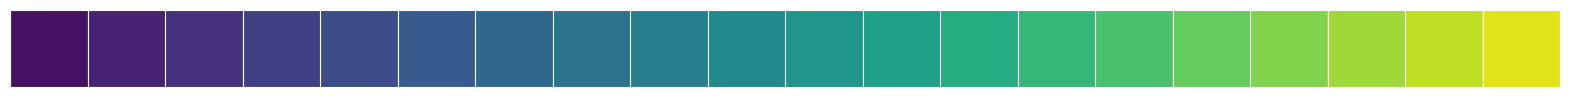

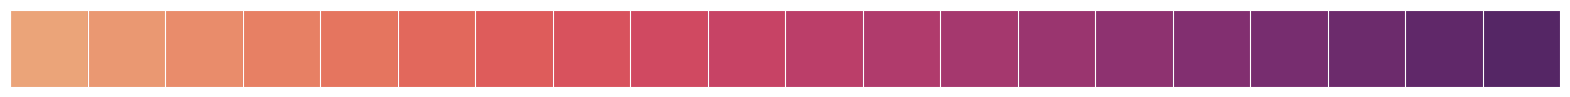

In [8]:
pl_viridis = sns.color_palette("viridis", 20)
sns.palplot(pl_viridis)  # Mostra 10 cores da paleta
print(pl_viridis) 
pl_flare = sns.color_palette("flare",20)
sns.palplot(pl_flare)  # Mostra 10 cores da paleta
print(pl_flare) 
plt.show()

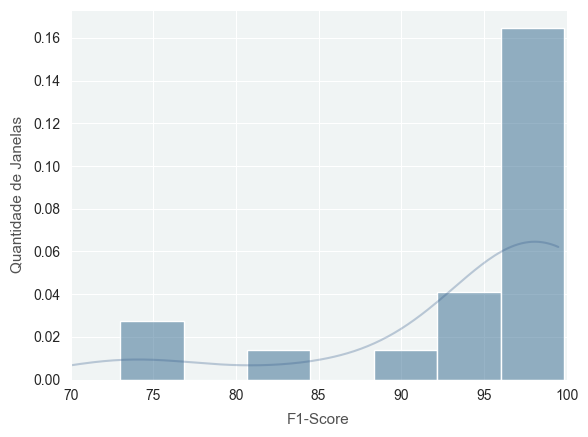

In [7]:
path_img = os.path.join(os.getcwd(),r"experiments_data\05_analyses\01_data\img")
if not os.path.exists(path_img): os.makedirs(path_img)

fontsize = 11
sns.set_style("darkgrid")
#'ax' is shortcut to "axes object"
#ax = sns.histplot(np_array, bins = 20, kde=True,color=(0.143343, 0.522773, 0.556295))
ax = sns.histplot(np_array, color=pl_viridis[6], alpha=0.5, stat="density")  # Histograma
ax = sns.kdeplot(np_array, color=pl_viridis[5], alpha=0.3,linewidth=1.5, clip=(None,99.5)) 

#ax.lines[0].set_color(colors[-1])
plt.xlabel("F1-Score", fontsize=fontsize, alpha=0.8,labelpad=7)
plt.ylabel("Quantidade de Janelas", fontsize=fontsize,alpha=0.8, labelpad=7)

#ax.set_xlabel("F1-Score", fontsize=fontsize)
#ax.set_ylabel("Quantidade de Janelas", fontsize=fontsize)
plt.xlim(70, 100)
plt.gca().set_facecolor((0.90,0.93,0.93,0.6)) 
#plt.gca().set_facecolor((0.90,0.90,0.98,0.5)) 

plt.savefig(os.path.join(path_img,"grafico.png"), dpi=300, format="png", bbox_inches="tight")
plt.savefig(os.path.join(path_img,"grafico.svg"), format="svg", bbox_inches="tight")
plt.show()

## Janelas Estatísticamente Superiores?

- Necessário identificar a distribuição antes de supor quais dados são estatiscamente diferentes, sejam maiores ou menores.
- Ao que tudo indica a distribuição é uma inflação de zero, nesse caso 100. Necessário utilizar o teste de Vuong para comparar se os dados são ou não.

In [15]:
general_mean = np.mean(np_array)
standard_deviation = np.std(np_array)
alpha = 0.05
critic_z = stats.norm.ppf(1 - alpha) 

# Identify statisc relevant values. Empty list, there's no valyues
valores_criticos = np_array[np_array > general_mean + critic_z * standard_deviation] 

print(f"General mean: {general_mean:.2f}")
print(f"Desvio padrão: {standard_deviation:.2f}")
print(f"Z critic: {critic_z:.2f}")
print(f"Statistical relevant vlaues: {valores_criticos}")

General mean: 96.38
Desvio padrão: 6.78
Z critic: 1.64
Statistical relevant vlaues: []


### Verificar Zero Inflated Distribution

In [ ]:
def vuong_test(m1, m2):
	modelo_poisson = m1
	modelo_zip = m2
	
	from scipy.stats import norm    

	if m1.__class__.__name__ == "GLMResultsWrapper":
		
		glm_family = modelo_poisson.model.family

		X = pd.DataFrame(data=m1.model.exog, columns=m1.model.exog_names)
		y = pd.Series(m1.model.endog, name=m1.model.endog_names)

		if glm_family.__class__.__name__ == "Poisson":
			m1 = Poisson(endog=y, exog=X).fit()
			
		if glm_family.__class__.__name__ == "NegativeBinomial":
			m1 = NegativeBinomial(endog=y, exog=X, loglike_method='nb2').fit()

	supported_models = [ZeroInflatedPoisson,ZeroInflatedNegativeBinomialP,Poisson,NegativeBinomial]
	
	if type(m1.model) not in supported_models:
		raise ValueError(f"Model type not supported for first parameter. List of supported models: (ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP, Poisson, NegativeBinomial) from statsmodels discrete collection.")
		
	if type(m2.model) not in supported_models:
		raise ValueError(f"Model type not supported for second parameter. List of supported models: (ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP, Poisson, NegativeBinomial) from statsmodels discrete collection.")
	
	# Extração das variáveis dependentes dos modelos
	m1_y = m1.model.endog
	m2_y = m2.model.endog

	m1_n = len(m1_y)
	m2_n = len(m2_y)

	if m1_n == 0 or m2_n == 0:
		raise ValueError("Could not extract dependent variables from models.")

	if m1_n != m2_n:
		raise ValueError("Models appear to have different numbers of observations.\n"
						f"Model 1 has {m1_n} observations.\n"
						f"Model 2 has {m2_n} observations.")

	if np.any(m1_y != m2_y):
		raise ValueError("Models appear to have different values on dependent variables.")
		
	m1_linpred = pd.DataFrame(m1.predict(which="prob"))
	m2_linpred = pd.DataFrame(m2.predict(which="prob"))        

	m1_probs = np.repeat(np.nan, m1_n)
	m2_probs = np.repeat(np.nan, m2_n)

	which_col_m1 = [list(m1_linpred.columns).index(x) if x in list(m1_linpred.columns) else None for x in m1_y]    
	which_col_m2 = [list(m2_linpred.columns).index(x) if x in list(m2_linpred.columns) else None for x in m2_y]

	for i, v in enumerate(m1_probs):
		m1_probs[i] = m1_linpred.iloc[i, which_col_m1[i]]

	for i, v in enumerate(m2_probs):
		m2_probs[i] = m2_linpred.iloc[i, which_col_m2[i]]

	lm1p = np.log(m1_probs)
	lm2p = np.log(m2_probs)

	m = lm1p - lm2p

	v = np.sum(m) / (np.std(m) * np.sqrt(len(m)))

	pval = 1 - norm.cdf(v) if v > 0 else norm.cdf(v)

	print("Vuong Non-Nested Hypothesis Test-Statistic (Raw):")
	print(f"Vuong z-statistic: {round(v, 3)}")
	print(f"p-value: {pval:.3f}")
	print("")
	print("==================Result======================== \n")
	if pval <= 0.05:
		print("H1: Indicates inflation of zeros at 95% confidence level")
	else:
		print("H0: Indicates no inflation of zeros at 95% confidence level")

# In[35]: Teste de Vuong propriamente dito para verificação de existência de
#inflação de zeros no modelo ZIP, em comparação com o modelo Poisson

## Outra Verificação de Janelas Estatísticamente Superiores
**Ideia**
1. Realizar uma **exploração incial**, analisando visualmente padrões e *outliers (top performers)*
2. Filtragem rápida. Identificar valores acima do Q3+ 1.5 IQR, isto é, **pontos fora da curva**.
3. Analisar se os resultados que se destacaram são significativos. Neste caso embasar o que foi identificado, aplicando **testes mais formais** depois (como Permutação/bootstrap ou Rosner modificado)

#### I - Exploração Inicial

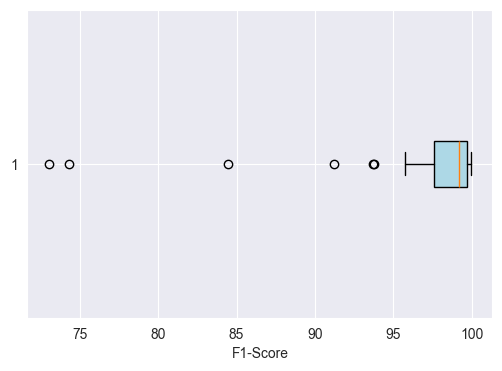

In [22]:
plt.figure(figsize=(6, 4))
plt.boxplot(np_array, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
#plt.title("Identificação de Resultados Discrepantes (Mlehores desempenhos)")
plt.xlabel("F1-Score")
plt.grid(True)
plt.show()

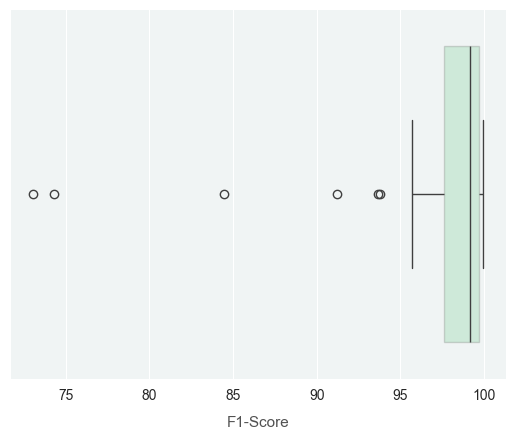

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
boxplot = sns.boxplot(np_array,orient='h', patch_artist=True)

for patch in boxplot.patches:
	patch.set_facecolor(color=pl_viridis[14])
	#patch.set_facecolor(color=pl_viridis[6])
	patch.set_alpha(0.2)   

plt.xlabel("F1-Score", fontsize=fontsize, alpha=0.8,labelpad=9)
plt.gca().set_facecolor((0.90,0.93,0.93,0.6)) 
plt.show()

In [97]:
# df here is unsmumarrized window
df = pd.read_csv(os.path.join(os.getcwd(),r"experiments_data\05_analyses\01_data\dt7_not_summarized_valid_window.csv"),delimiter=';')
mxn = [ str(df.window[index])+"x"+str(df.samples_summarized[index]) for index, row in df.iterrows() ]
df["mxn"] = mxn 
df = df.query("model != 'DUM'")

df.info()
df.head()

print(df["experiment"].unique())


<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 1133
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   experiment          989 non-null    object 
 1   model               989 non-null    object 
 2   window              989 non-null    int64  
 3   samples_summarized  989 non-null    int64  
 4   accuracy_train      989 non-null    float64
 5   accuracy_test       989 non-null    float64
 6   presicion           989 non-null    float64
 7   recall              989 non-null    float64
 8   f1_score            989 non-null    float64
 9   mxn                 989 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 85.0+ KB
['02_unique_values_unbalanced_0.0.1_stratified_kfold.csv'
 '03_unique_values_balanced_0.0.0_stratified_kfold.csv'
 '04_large_duplicate_values_0.1.0_stratified_kfold.csv']


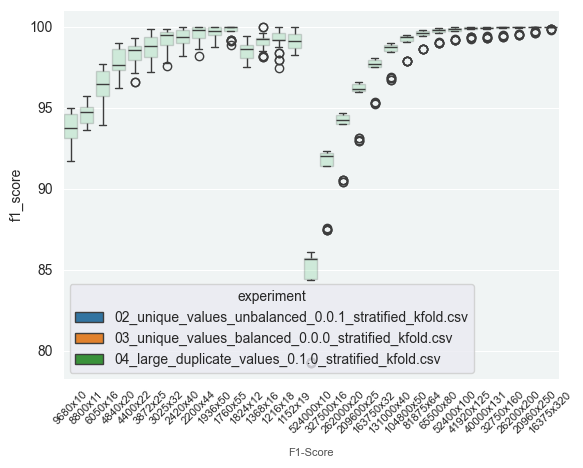

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
boxplot = sns.boxplot(x=df.mxn,y=df.f1_score,orient='v', patch_artist=True,hue=df.experiment)

for patch in boxplot.patches:
	patch.set_facecolor(color=pl_viridis[14])
	#patch.set_facecolor(color=pl_viridis[6])
	patch.set_alpha(0.2)

plt.xticks(rotation=45, fontsize=8)
plt.xlabel("F1-Score", fontsize=8, alpha=0.8,labelpad=9)
plt.gca().set_facecolor((0.90,0.93,0.93,0.6)) 
plt.show()

In [142]:
print(df_window.head())

   Experimento   Janela  Méd. F1-Score  Total Observações  Proporção Janela  \
0            2  1760x55      99.780715              96800          0.018182   
1            2  1936x50      99.690412              96800          0.020000   
2            2  2200x44      99.566258              96800          0.022727   
3            2  2420x40      99.335553              96800          0.025000   
4            2  3025x32      99.211811              96800          0.031250   

   Proporção Observação  Ordem  MaxMed  
0              0.000568      1       1  
1              0.000517      2       0  
2              0.000455      3       0  
3              0.000413      4       0  
4              0.000331      5       0  


C:\Users\PedroAlmeida\AppData\Local\Temp\ipykernel_28708\2192158930.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(unique_classes, rotation=45, fontsize=8)
C:\Users\PedroAlmeida\AppData\Local\Temp\ipykernel_28708\2192158930.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(unique_classes, rotation=45, fontsize=8)
C:\Users\PedroAlmeida\AppData\Local\Temp\ipykernel_28708\2192158930.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(unique_classes, rotation=45, fontsize=8)


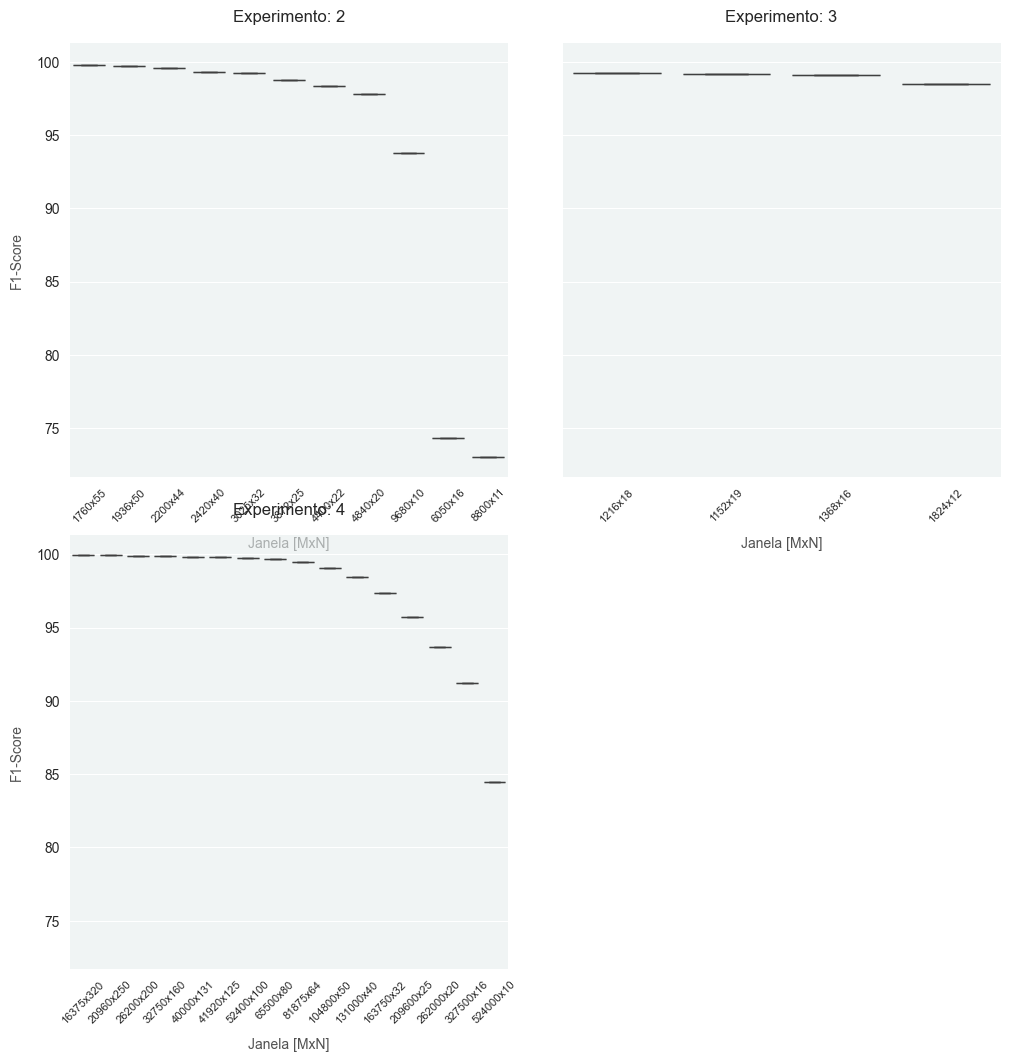

In [149]:
category_colors = {
	'2': pl_flare[9]
 	,'3': pl_viridis[8]
 	,'4': pl_viridis[11]
}

df_window["Experimento"] = [str(x) for x in df_window["Experimento"]]

g = sns.FacetGrid(df_window, col="Experimento", col_wrap=2, height=5, sharex=False)
fig.subplots_adjust(top=0.9, hspace=0.5)  # Add top margin and adjust vertical spacing

for ax, category in zip(g.axes.flat, df_window["Experimento"].unique()):
    subset = df_window[df_window["Experimento"] == category]  # Filter data for the current category
    unique_classes = subset["Janela"].unique()  # Get existing classes for this category
    
    boxplot = sns.boxplot(x="Janela", y="Méd. F1-Score", data=subset, ax=ax, order=unique_classes, patch_artist=True)  

    for patch in boxplot.patches:
        patch.set_facecolor(category_colors[category])
        patch.set_alpha(0.5)

    label_size = 10
    ax.set_title(f"Experimento: {category}", pad=15)  # Adjust title padding for better spacing
    ax.set_xticklabels(unique_classes, rotation=45, fontsize=8)
    ax.set_xlabel("Janela [MxN]", fontsize=label_size, alpha=0.8, labelpad=9)
    ax.set_ylabel("F1-Score", fontsize=label_size, alpha=0.8, labelpad=9)
    ax.set_facecolor((0.90, 0.93, 0.93, 0.6))

plt.show()


C:\Users\PedroAlmeida\AppData\Local\Temp\ipykernel_28708\2393540920.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(unique_classes, rotation=45, fontsize=8)
C:\Users\PedroAlmeida\AppData\Local\Temp\ipykernel_28708\2393540920.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(unique_classes, rotation=45, fontsize=8)
C:\Users\PedroAlmeida\AppData\Local\Temp\ipykernel_28708\2393540920.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(unique_classes, rotation=45, fontsize=8)


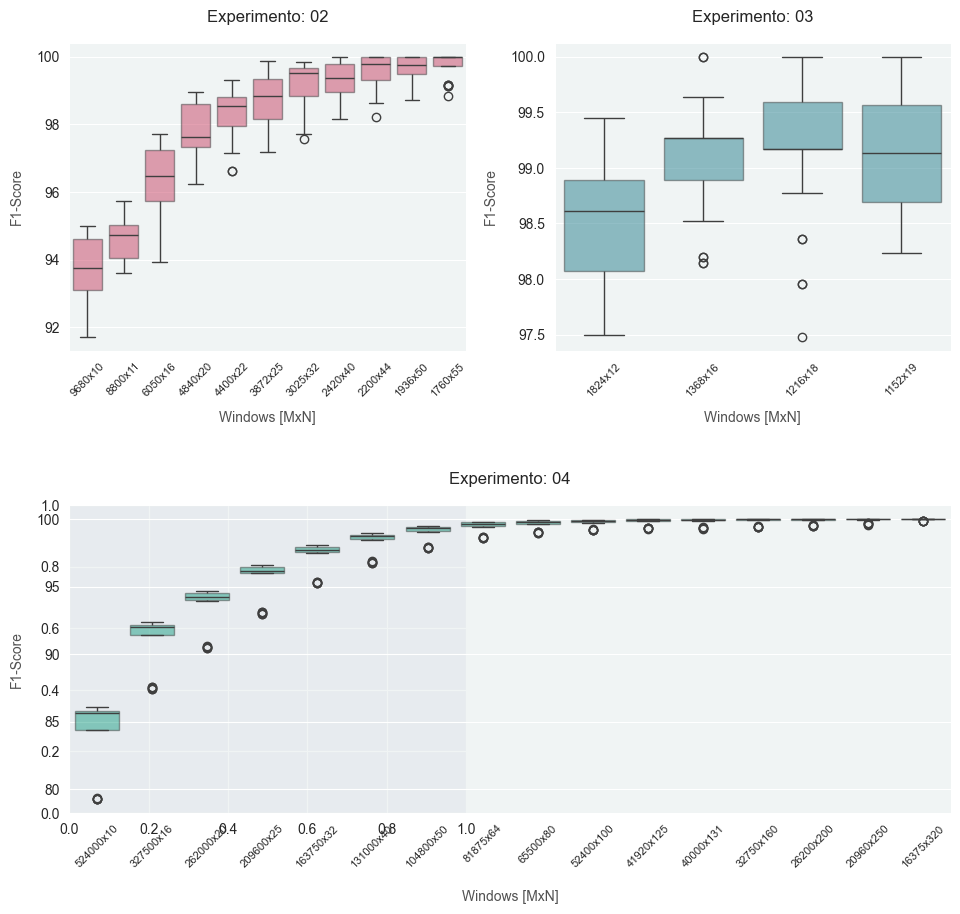

In [125]:
# Sample category colors
category_colors = {
    "02_unique_values_unbalanced_0.0.1_stratified_kfold.csv": pl_flare[9],
    "03_unique_values_balanced_0.0.0_stratified_kfold.csv": pl_viridis[8],
    "04_large_duplicate_values_0.1.0_stratified_kfold.csv": pl_viridis[11],
}

# Get unique experiments
unique_experiments = df["experiment"].unique()

# Determine number of rows (last row will have a single, full-width plot)
n_rows = (len(unique_experiments) - 1) // 2 + 1

fig, axes = plt.subplots(n_rows, 2, figsize=(10, 5 * n_rows), sharex=False)
axes = axes.flatten()

# Iterate through experiments and plot
for i, category in enumerate(unique_experiments):
    subset = df[df["experiment"] == category]
    unique_classes = subset["mxn"].unique()

    if i == len(unique_experiments) - 1:  # Last chart should be full-width
        ax = fig.add_subplot(n_rows, 1, n_rows)  # Full width subplot
    else:
        ax = axes[i]

    # Boxplot
    boxplot = sns.boxplot(x="mxn", y="f1_score", data=subset, ax=ax, order=unique_classes, patch_artist=True)

    for patch in boxplot.patches:
        patch.set_facecolor(category_colors[category])
        patch.set_alpha(0.5)  # Ensure partial opacity for better contrast

    ax.set_title(f"Experimento: {category[:2]}", pad=15)
    ax.set_xticklabels(unique_classes, rotation=45, fontsize=8)

    # Adjust spacing for the last chart's xlabel and xticklabels
    label_pad = 15 if i == len(unique_experiments) - 1 else 9
    ax.set_xlabel("Windows [MxN]", fontsize=10, alpha=0.8, labelpad=label_pad)
    ax.set_ylabel("F1-Score", fontsize=10, alpha=0.8, labelpad=9)

    # Ensure consistent facecolor across resized section
    ax.set_facecolor((0.90, 0.93, 0.93, 0.6))

# Remove unused empty axes
for j in range(len(unique_experiments), len(axes)):
    fig.delaxes(axes[j])  # Delete extra axes

# Adjust layout and spacing
fig.tight_layout()
fig.subplots_adjust(top=0.9, hspace=0.5)  # Top margin & vertical spacing

# Save and display the plot
path_img = os.path.join(os.getcwd(), r"experiments_data\05_analyses\01_data\img")
plt.savefig(os.path.join(path_img, "boxplot_valid_window.png"), dpi=300, format="png", bbox_inches="tight")
plt.savefig(os.path.join(path_img, "boxplot_valid_window.svg"), format="svg", bbox_inches="tight")

plt.show()

In [9]:
df_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Experimento           31 non-null     int64  
 1   Janela                31 non-null     object 
 2   Méd. F1-Score         31 non-null     float64
 3   Total Observações     31 non-null     int64  
 4   Proporção Janela      31 non-null     float64
 5   Proporção Observação  31 non-null     float64
 6   Ordem                 31 non-null     int64  
 7   MaxMed                31 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.1+ KB


Experiment: 2, data (7): [99.21181094 98.76049489 98.33600697 97.79298769 93.76685438 74.31344288
 73.01536573]

Experiment: 4, data (12): [99.83775864 99.82874511 99.75430975 99.66212143 99.4823438  99.0819103
 98.43003457 97.36878244 95.71463001 93.68927282 91.23677584 84.45082828]



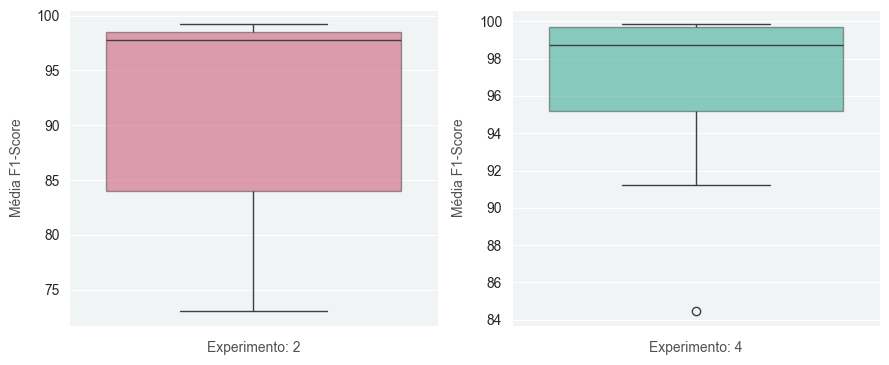

In [10]:
#df_2_3 = df_window.query("Experimento != 4")
#df_2_3 = df_window.copy()
sns.set_style("darkgrid")
# Sample category colors
category_colors = {
	2: pl_flare[9],
	3: pl_viridis[8],
	4: pl_viridis[11],
}

# Determine number of rows (last row will have a single, full-width plot)
#n_rows = (len(unique_experiments) - 1) // 2 + 1

fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=False)
axes = axes.flatten()
unique_experiments = df_window["Experimento"].unique()

# Iterate through experiments and plot
for i, experiment in enumerate(unique_experiments):
	subset = df_window[df_window["Experimento"] == experiment]
	unique_classes = subset["Méd. F1-Score"].unique()

	print(f"Experiment: {experiment}, data ({len(unique_classes)}): {np.sort(unique_classes)[::-1]}\r\n")
	ax = axes[i]

	boxplot = sns.boxplot(x="Experimento", y="Méd. F1-Score", data=subset, ax=ax, patch_artist=True)
	for patch in boxplot.patches:
		patch.set_facecolor(category_colors[experiment])
		patch.set_alpha(0.5)  # Ensure partial opacity for better contrast
		
	ax.set_xticklabels([])
	#ax.set_xticklabels(["Média F1-Score"], fontsize=8)
	
	ax.set_xlabel(f"Experimento: {experiment}", fontsize=10, alpha=0.8)
	ax.set_ylabel("Média F1-Score", fontsize=10, alpha=0.8, labelpad=9)

	# Ensure consistent facecolor across resized section
	ax.set_facecolor((0.90, 0.93, 0.93, 0.6))

# Adjust layout and spacing
fig.tight_layout()
fig.subplots_adjust(top=0.9, hspace=0.4)  # Top margin & vertical spacing

# Save and display the plot
path_img = os.path.join(os.getcwd(), r"experiments_data\05_analyses\01_data\img")
plt.savefig(os.path.join(path_img, "boxplot_valid_window.png"), dpi=300, format="png", bbox_inches="tight")
plt.savefig(os.path.join(path_img, "boxplot_valid_window.svg"), format="svg", bbox_inches="tight")

plt.show()

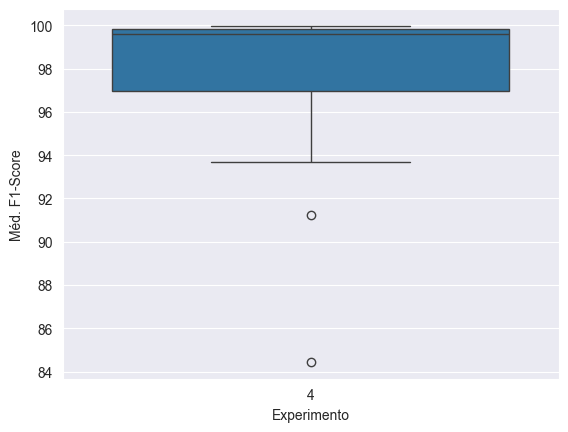

In [101]:
df_4 = df_window.query("Experimento == 4")
sns.set_style("darkgrid")

sns.boxplot(x=df_4["Experimento"], y=df_4["Méd. F1-Score"], patch_artist=True)
#sns.boxplot(y=df_4["Méd. F1-Score"])

plt.show()

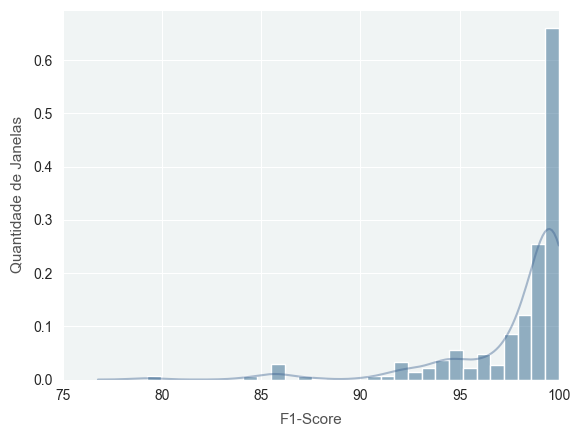

In [136]:
path_img = os.path.join(os.getcwd(),r"experiments_data\05_analyses\01_data\img")
if not os.path.exists(path_img): os.makedirs(path_img)
x_tick_limit = (75,100)
fontsize = 11
sns.set_style("darkgrid")
#'ax' is shortcut to "axes object"
#ax = sns.histplot(np_array, bins = 20, kde=True,color=(0.143343, 0.522773, 0.556295))
ax = sns.histplot(np_array, color=pl_viridis[6], bins=30, alpha=0.5, stat="density")  # Histograma
ax = sns.kdeplot(np_array, color=pl_viridis[5], alpha=0.4,linewidth=1.5, clip=x_tick_limit) 

#ax.lines[0].set_color(colors[-1])
plt.xlabel("F1-Score", fontsize=fontsize, alpha=0.8,labelpad=7)
plt.ylabel("Quantidade de Janelas", fontsize=fontsize,alpha=0.8, labelpad=7)

#ax.set_xlabel("F1-Score", fontsize=fontsize)
#ax.set_ylabel("Quantidade de Janelas", fontsize=fontsize)
plt.xlim(x_tick_limit)
plt.gca().set_facecolor((0.90,0.93,0.93,0.6)) 
#plt.gca().set_facecolor((0.90,0.90,0.98,0.5)) 

plt.savefig(os.path.join(path_img,"histogram_valid_window.png"), dpi=300, format="png", bbox_inches="tight")
plt.savefig(os.path.join(path_img,"histogram_valid_window.svg"), format="svg", bbox_inches="tight")
plt.show()

#### II - Pontos Fora da Curva

In [98]:
# 2. Calcular Q1, Q3 e IQR
np_array = np.array(df["f1_score"], dtype=float)
print(np_array)

Q1 = np.percentile(np_array, 25)
Q3 = np.percentile(np_array, 75)
IQR = Q3 - Q1

# 3. Definir limite superior para outliers
limite_superior = Q3 + 1.5 * IQR

# 4. Identificar outliers superiores
outliers_iqr = np_array[np_array > limite_superior]

print(f"Q1 = {Q1:.3f}, Q3 = {Q3:.3f}, IQR = {IQR:.3f}")
print(f"Limite superior = {limite_superior:.3f}")
print("Outliers detectados pelo IQR:")
print(outliers_iqr)

[ 94.98432602  94.91880566  94.83667018  94.77459016  94.74232171
  94.70372313  94.69429005  94.63157895  94.60887949  94.60450498
  94.57037428  94.5473251   94.34161819  94.27220179  94.17322835
  94.11151641  94.09304757  93.75650364  93.64997419  93.58569926
  93.55007866  93.48500517  93.36787565  93.31291475  93.30608074
  93.2642487   92.93032787  92.87234043  92.8153273   92.63266358
  92.60020555  92.58496395  92.45689655  92.34884965  91.7109458
  95.74223245  95.62211982  95.5967555   95.51066218  95.23255814
  95.0838635   95.0307091   95.01738123  94.99136442  94.97716895
  94.93670886  94.8630137   94.78510029  94.73100388  94.64594128
  94.62242563  94.62116831  94.61009174  94.486361    94.06392694
  94.01129944  93.9582157   93.91206313  93.6416185   93.62455726
  93.61948956  93.6         97.70491803  97.61316872  97.58935993
  97.51655629  97.37704918  97.35099338  97.25685786  97.24770642
  96.784831    96.66666667  96.6442953   96.53465347  96.48241206
  96.464646

#### III - Testes Mais Formais

In [12]:
# 1. Ordenar os dados
dados_ordenados = np.sort(np_array)
indices_ordenados = np.argsort(np_array)

# 2. Permutação
n_perm = 10000
permutacoes = np.array([np.random.permutation(np_array) for _ in range(n_perm)])

# 3. Calcular valores esperados sob permutação
esperados = np.mean(np.sort(permutacoes, axis=1), axis=0)

# 4. Calcular p-valor empírico para cada posição
p_valores = []
for i in range(19):
	p = np.sum(permutacoes[:, i] >= dados_ordenados[i]) / n_perm
	p_valores.append(p)

# 5. Mostrar significantes (p < 0.05)
print("\nValores estatisticamente altos (p < 0.05):")
for i in range(19):
	if p_valores[i] < 0.05:
		idx = indices_ordenados[i]
		print(f"Valor = {dados_ordenados[i]:.3f} (posição {idx}), p = {p_valores[i]:.4f}")


Valores estatisticamente altos (p < 0.05):


### Tudo Junto

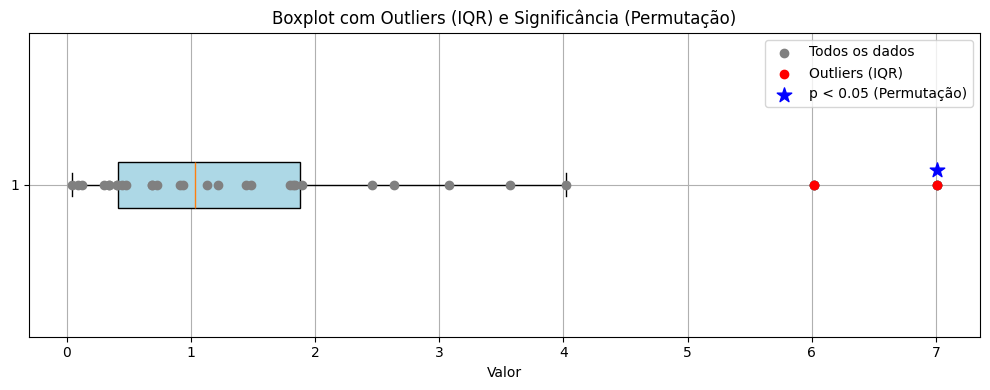

In [ ]:

# 1. Gerar dados assimétricos (exponencial)
np.random.seed(42)
dados = np.random.exponential(scale=2.0, size=30)
#dados = np_array

# 2. Calcular Q1, Q3, IQR e limite superior
Q1 = np.percentile(dados, 25)
Q3 = np.percentile(dados, 75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# 3. Identificar outliers heurísticos (IQR)
outliers_iqr_idx = np.where(dados > limite_superior)[0]

# 4. Permutação para p-valores empíricos
dados_ordenados = np.sort(dados)
indices_ordenados = np.argsort(dados)
n_perm = 10000
permutacoes = np.array([np.random.permutation(dados) for _ in range(n_perm)])
esperados = np.mean(np.sort(permutacoes, axis=1), axis=0)

# 5. Calcular p-valores empíricos
p_valores = []
significativos_idx = []
for i in range(30):
	p = np.sum(permutacoes[:, i] >= dados_ordenados[i]) / n_perm
	p_valores.append(p)
	if p < 0.05:
		significativos_idx.append(indices_ordenados[i])

# 6. Plot: Boxplot + marcações
plt.figure(figsize=(10, 4))
plt.boxplot(dados, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot com Outliers (IQR) e Significância (Permutação)")
plt.xlabel("Valor")

# 7. Adicionar pontos dos dados
plt.scatter(dados, np.ones_like(dados), color='gray', label='Todos os dados', zorder=2)

# 8. Marcar outliers por IQR (vermelho)
plt.scatter(dados[outliers_iqr_idx], np.ones_like(outliers_iqr_idx), 
			color='red', label='Outliers (IQR)', zorder=3)

# 9. Marcar valores com p < 0.05 (azul)
plt.scatter(dados[significativos_idx], np.ones_like(significativos_idx) + 0.05, 
			color='blue', marker='*', s=120, label='p < 0.05 (Permutação)', zorder=4)

plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


1. Gera 30 valores contínuos aleatórios com numpy.
2. Ordena os valores reais.
3. Calcula, para cada valor, a posição relativa (rank).
4. Realiza 10.000 permutações aleatórias dos dados.
5. Para cada valor real, calcula um p-valor empírico com base em quantas vezes ele é maior do que os valores permutados na mesma posição.
6. Imprime os valores que são estatisticamente altos com p < 0.05.

Top performers (p < 0.05):
Valor = 99.968 (posição 15), p = 0.0301


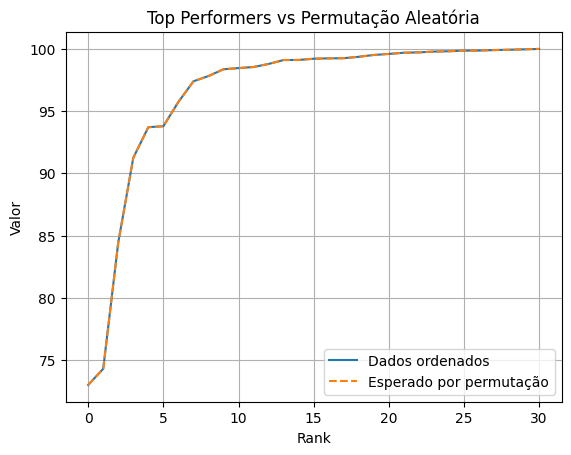

In [ ]:
#1. Gerar 30 valores contínuos aleatórios (não normal)

np.random.seed(42)
#dados = np.random.exponential(scale=2.0, size=30)  # Distribuição assimétrica
dados = np_array
samples_size = len(dados)

# 2. Ordenar os dados reais e guardar os índices
dados_ordenados = np.sort(dados)
indices_ordenados = np.argsort(dados)

# 3. Configuração do teste de permutação
n_permutacoes = 10000
permutacoes = np.array([np.random.permutation(dados) for _ in range(n_permutacoes)])

# 4. Para cada posição no ranking, calcular o valor médio permutado
valores_esperados = np.mean(np.sort(permutacoes, axis=1), axis=0)

# 5. Calcular p-valor empírico para cada posição
p_valores = []
for i in range(samples_size):
	valores_maiores = np.sum(permutacoes[:, i] >= dados_ordenados[i])
	p_empirico = valores_maiores / n_permutacoes
	p_valores.append(p_empirico)

# 6. Mostrar top performers com p < 0.05
print("Top performers (p < 0.05):")
for i in range(samples_size):
	if p_valores[i] < 0.05:
		idx_original = indices_ordenados[i]
		print(f"Valor = {dados_ordenados[i]:.3f} (posição {idx_original}), p = {p_valores[i]:.4f}")

# (Opcional) Visualização
plt.plot(range(samples_size), dados_ordenados, label='Dados ordenados')
plt.plot(range(samples_size), valores_esperados, label='Esperado por permutação', linestyle='--')
plt.xlabel("Rank")
plt.ylabel("Valor")
plt.title("Top Performers vs Permutação Aleatória")
plt.legend()
plt.grid(True)
plt.show()
